In [158]:
import unicodedata
import re
import json
import matplotlib as plt
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords

import pandas as pd
import collections
import prep

df= pd.read_json('data.json')
df.head()

df=pd.DataFrame(df)

df=prep.basic_clean(df)
df.head()

#Remove characters between [] and <>
df.readme_contents
for contents in df.readme_contents:
    re.sub(r" ?\([^)]+\)", " ", contents)
    re.sub(r" ?\(<^>]+\)", " ", contents)
    if len(contents)>8

In [163]:
df= pd.read_csv("test.csv")
df = df.dropna()
df = df[df.clean_contents.apply(len) > 200]
df.head()

,repo,language,readme_contents,clean_contents
0,freeCodeCamp/freeCodeCamp,JavaScript,![freeCodeCamp.org Social Banner](https://s3.a...,freecodecamporgs opensource codebase curriculu...
1,vuejs/vue,JavaScript,"<p align=""center""><a href=""https://vuejs.org"" ...",supporting vuejs vuejs mitlicensed open source...
2,facebook/react,JavaScript,# [React](https://reactjs.org/) &middot; [![Gi...,react javascript library building user interfa...
3,twbs/bootstrap,JavaScript,"<p align=""center"">\n <a href=""https://getboot...",bootstrap sleek intuitive powerful frontend fr...
4,airbnb/javascript,JavaScript,# Airbnb JavaScript Style Guide() {\n\n*A most...,airbnb javascript style guide mostly reasonabl...


In [160]:
#Breakdown of languages within the DataFramne
languages = pd.concat([df.language.value_counts(),
                    df.language.value_counts(normalize=True)], axis=1)
languages.columns = ['n', 'percent']
languages

,n,percent
JavaScript,128,0.267223
Python,121,0.252610
Java,121,0.252610
PHP,109,0.227557


In [161]:
top_words= pd.Series(" ".join(df.clean_contents).split()).value_counts()[2:65]
top_words

python         1846
c              1723
php            1615
using          1479
function       1325
code           1263
new            1184
support        1184
library        1148
project        1109
data           1055
run             940
example         939
return          934
install         931
source          925
javascript      893
default         893
class           888
also            873
react           863
open            844
version         844
application     833
api             811
yes             794
see             781
web             762
object          761
native          759
               ... 
value           748
server          725
list            722
method          715
image           710
simple          705
de              702
make            701
one             697
like            693
used            688
user            671
need            671
java            668
system          665
get             657
command         655
mit             654
request         647


In [165]:
df['content_words']= df.clean_contents.str.split()

In [166]:
py_words = pd.Series(df[df.language == 'Python'].content_words.sum())
java_words = pd.Series(df[df.language == 'Java'].content_words.sum())
js_words = pd.Series(df[df.language == 'JavaScript'].content_words.sum())
php_words = pd.Series(df[df.language == 'PHP'].content_words.sum())
#all_words= pd.Series(df[df.language==[all]].content_words.sum())
py_words= py_words.value_counts()[0:100].index
java_words=java_words.value_counts()[0:100].index
js_words=js_words.value_counts()[0:100].index
php_words=php_words.value_counts()[0:100].index
#all_words= all_words.value_counts()[0:100].index



In [167]:
py_freq = pd.Series(py_words).value_counts()
java_freq = pd.Series(java_words).value_counts()
js_freq= pd.Series(js_words).value_counts()
php_freq=pd.Series(php_words).value_counts()

In [6]:
word_counts = (pd.concat([py_freq, java_freq, js_freq, php_freq], axis=1, sort=True)
                .set_axis(['Python', 'Java', 'JavaScript', 'php'], axis=1, inplace=False)
                .fillna(0)
                .apply(lambda s: s.astype(int)))
                

word_counts.tail()

,Python,Java,JavaScript,php
without,0,1,0,0
work,0,1,1,1
x,1,1,0,0
xml,0,1,0,0
yes,1,0,0,0


In [143]:
pd.Series(" ".join(df.language)== 'Python'.split()).value_counts()


False    1
dtype: int64

In [8]:
all=['Python', 'Java', 'JavaScript', 'php']

In [9]:
#words occuring in all language readme
word_counts.sort_values(by=all, ascending=False).head(10)

,Python,Java,JavaScript,php
add,1,1,1,1
also,1,1,1,1
application,1,1,1,1
code,1,1,1,1
data,1,1,1,1
default,1,1,1,1
example,1,1,1,1
feature,1,1,1,1
file,1,1,1,1
get,1,1,1,1


In [169]:
#Words that are unique to each catgory
Language_word_count= pd.concat([word_counts[word_counts.Python == 0].sort_values(by='Python').tail(6),
           word_counts[word_counts.Java == 0].sort_values(by='Java').tail(6),
           word_counts[word_counts.JavaScript == 0].sort_values(by='JavaScript').tail(6),
           word_counts[word_counts.php == 0].sort_values(by='php').tail(6)])

In [170]:
Language_word_count['Python']

exception    0
error        0
element      0
echo         0
work         0
xml          0
flutter      1
fix          1
false        0
f            1
window       1
yes          1
following    0
flutter      1
fix          1
f            1
xml          0
yes          1
go           0
free         1
format       1
flutter      1
xml          0
yes          1
Name: Python, dtype: int64

In [171]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

(word_counts
 .assign(p_python=word_counts.Python / word_counts[all],
         p_java=word_counts.Java / word_counts[all],
       )
 .sort_values(by=[all])
 [['p_python', 'p_java']]
 .tail(20)
 .sort_values('p_python')
 .plot.barh(stacked=True))

plt.title('Proportion of python vs all for the 20 most common words')

In [172]:
from wordcloud import WordCloud

In [173]:
py_cloud = WordCloud(background_color='black', height=600, width=800).generate(' '.join(py_words[0:20]))
java_cloud=WordCloud(background_color='white', height=600, width=800).generate(' '.join(java_words[0:20]))
js_cloud=WordCloud(background_color='white', height=600, width=800).generate(' '.join(js_words[0:20]))
php_cloud=WordCloud(background_color='black', height=600, width=800).generate(' '.join(php_words[0:20]))
#spam_cloud = WordCloud(background_color='white', height=600, width=800).generate(' '.join(spam_words))
php_cloud

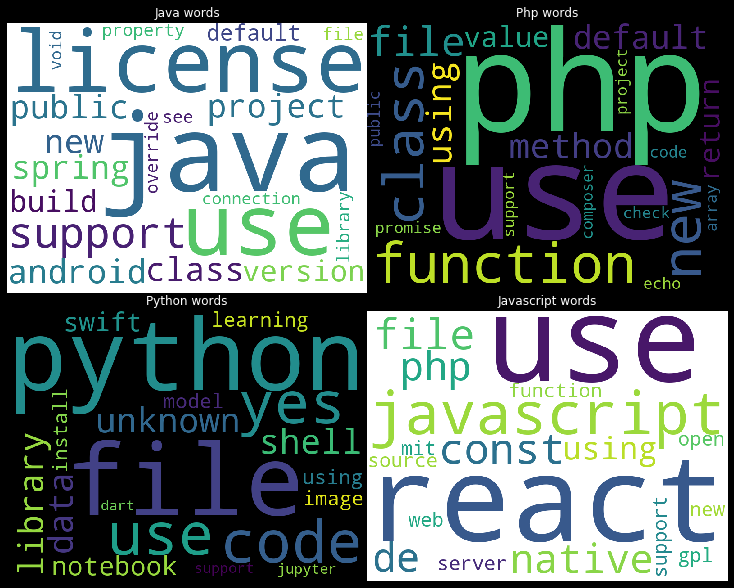

In [174]:
plt.style.use('dark_background')
plt.figure(figsize=(10, 8))
axs = [plt.axes([0, 0, .5, .5]), plt.axes([0, .5, .5, .5]), plt.axes([.5, 0, .5, .5]), plt.axes([.5, .5, .5, .5])]

axs[0].imshow(py_cloud)
axs[1].imshow(java_cloud)
axs[2].imshow(js_cloud)
axs[3].imshow(php_cloud)



axs[0].set_title('Python words')
axs[1].set_title('Java words')
axs[2].set_title('Javascript words')
axs[3].set_title('Php words')


for ax in axs: ax.axis('off')

Modeling

In [199]:
from pprint import pprint

import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt


0      freecodecamporgs opensource codebase curriculu...
1      supporting vuejs vuejs mitlicensed open source...
2      react javascript library building user interfa...
3      bootstrap sleek intuitive powerful frontend fr...
4      airbnb javascript style guide mostly reasonabl...
5      datadriven document javascript library visuali...
6      react native learn write anywhere build mobile...
7      create react app create react apps build confi...
8      axios promise based http client browser nodejs...
9      nodejs javascript runtime built chrome v javas...
10     version iconic svg font cs framework internet ...
11     using angularjs closure compiler closure compi...
12     algoritmos estructuras de datos en javascript ...
13     threejs javascript library aim project create ...
14     puppeteer puppeteer node library provides high...
15     second code short javascript code snippet deve...
16     materialui component implement installation ma...
17     new wave javascript cont

In [178]:
raw_count = pd.Series(top_words)

Text(0.5, 1.0, '20 most common words')

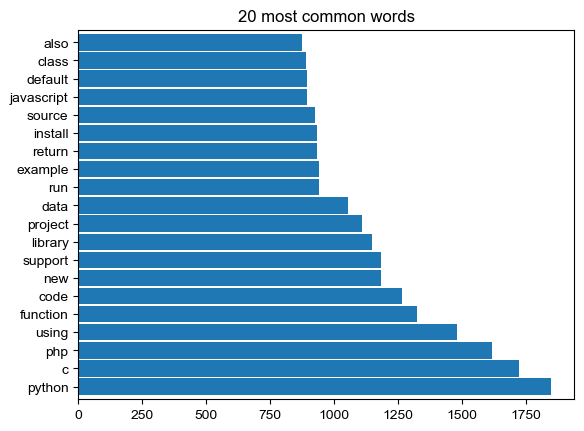

In [187]:
raw_count.sort_values(ascending=False)[0:20].plot.barh(width=.9)
plt.style.use('seaborn-dark')
plt.title('20 most common words')

In [111]:

# type(raw_count)

tf_df = pd.DataFrame({'raw_count': raw_count})

tf_df = tf_df.assign(frequency = lambda df: df.raw_count / df.raw_count.sum())

tf_df = tf_df.assign(augmented_frequency = lambda df: df.frequency / df.frequency.max())

tf_df.frequency.max()

tf_df.head(10)

,raw_count,frequency,augmented_frequency
file,1975,0.035749,1.000000
python,1846,0.033414,0.934684
c,1723,0.031188,0.872405
php,1615,0.029233,0.817722
using,1479,0.026771,0.748861
function,1325,0.023984,0.670886
code,1263,0.022861,0.639494
new,1184,0.021431,0.599494
support,1184,0.021431,0.599494
library,1148,0.020780,0.581266


In [180]:
tf_df = (pd.DataFrame({'raw_count': raw_count})
         .assign(frequency=lambda df: df.raw_count / df.raw_count.sum())
         .assign(augmented_frequency=lambda df: df.frequency / df.frequency.max()))

tf_df.head(10)

,raw_count,frequency,augmented_frequency
python,1846,0.034653,1.000000
c,1723,0.032344,0.933369
php,1615,0.030317,0.874865
using,1479,0.027764,0.801192
function,1325,0.024873,0.717768
code,1263,0.023709,0.684182
new,1184,0.022226,0.641387
support,1184,0.022226,0.641387
library,1148,0.021550,0.621885
project,1109,0.020818,0.600758


In [204]:
# get tfs
tfidf = TfidfVectorizer()
tfidfs = tfidf.fit_transform(df['clean_contents'])
pd.DataFrame(tfidfs.todense(), columns = tfidf.get_feature_names()).head()


,aa,aaa,aaaa,aaaaaaaaaaaaaaaaaaaa,aaaaaaaaaaaaaaaaaaaaa,aaaabaaaa,aaai,aac,aacfaaceasyaacencoderwindowslinuxarm,aadedddcefaccbeffb,...,zxf,zxing,zxingappspotcom,zxingbased,zxingorg,zxp,zxvf,zycycleviewswift,zypper,zyszysgmailcom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [206]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

X = pd.DataFrame(tfidfs.todense(), columns = tfidf.get_feature_names())
y = df.language

X_train, X_test, y_train, y_test = train_test_split(X,y,stratify = y, random_state = 123)

train = pd.DataFrame(dict(actual = y_train))
test = pd.DataFrame(dict(actual = y_test))

tree = DecisionTreeClassifier(max_depth=).fit(X_train,y_train)

train['predicted'] = tree.predict(X_train)
test['predicted']= tree.predict(X_test)

In [207]:
print('our train accuracy is: ',accuracy_score(train.actual, train.predicted))
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print(classification_report(train.actual, train.predicted))


our train accuracy is:  0.9610027855153204
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
              precision    recall  f1-score   support

        Java       1.00      0.99      0.99        90
  JavaScript       1.00      0.94      0.97        96
         PHP       1.00      0.91      0.96        82
      Python       0.87      1.00      0.93        91

    accuracy                           0.96       359
   macro avg       0.97      0.96      0.96       359
weighted avg       0.97      0.96      0.96       359



TypeError: 'WordCloud' object is not callable